# Aperture Photometry and Registration of Project01

In [1]:
#Stating theme
import jupyterthemes as jt
!jt -t solarizedl -T -N -kl -nfs 11 -fs 11 -ofs 11 -cursc r -cellw 90%
jt.jtplot.style()
jt.get_themes()

['chesterish',
 'grade3',
 'gruvboxd',
 'gruvboxl',
 'monokai',
 'oceans16',
 'onedork',
 'solarizedd',
 'solarizedl']

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import astropy
from astropy.table import table
from astropy.io import fits
from astropy.wcs import WCS

import prometheus

In [3]:
# %matplotlib notebook
%matplotlib inline

In [4]:
ls *_proc.fits

 Volume in drive C has no label.
 Volume Serial Number is F64F-FF16

 Directory of C:\Users\jarde\Documents\GitHub\ObservationalAstro_PHSX491\project01

11/19/2021  12:05 AM        82,212,480 CCD Image 123_proc.fits
11/19/2021  12:05 AM        82,212,480 CCD Image 124_proc.fits
11/19/2021  12:05 AM        82,212,480 CCD Image 125_proc.fits
11/19/2021  12:05 AM        82,212,480 CCD Image 126_proc.fits
11/19/2021  12:05 AM        82,212,480 CCD Image 127_proc.fits
11/19/2021  12:05 AM        82,212,480 CCD Image 128_proc.fits
11/19/2021  12:05 AM        82,212,480 CCD Image 129_proc.fits
11/19/2021  12:05 AM        82,212,480 CCD Image 138_proc.fits
11/19/2021  12:05 AM        82,212,480 CCD Image 139_proc.fits
11/19/2021  12:05 AM        82,212,480 CCD Image 362_proc.fits
11/19/2021  12:05 AM        82,212,480 CCD Image 363_proc.fits
11/19/2021  12:05 AM        82,212,480 TransitSet11-0002R_proc.fits
11/19/2021  12:05 AM        82,212,480 TransitSet11-0003B_proc.fits
11/19/2021  12:05 

CCD Image 363_proc.fits


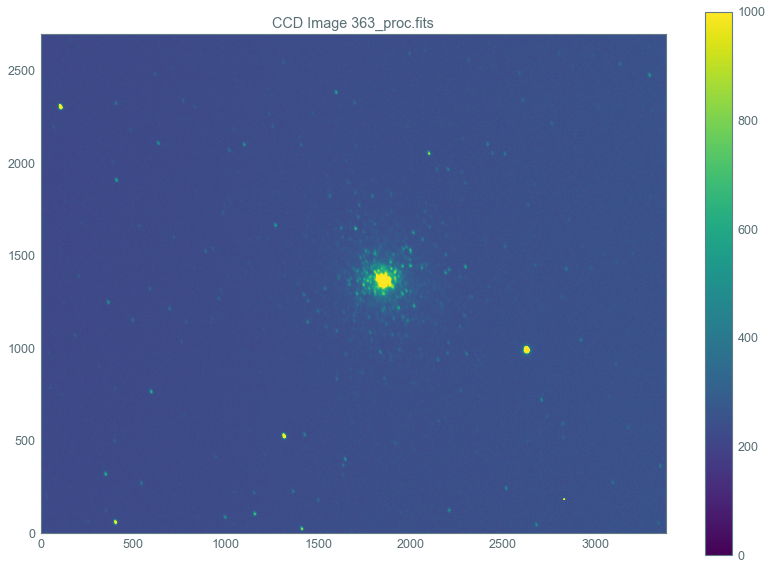

TransitSet11-0004G_proc.fits


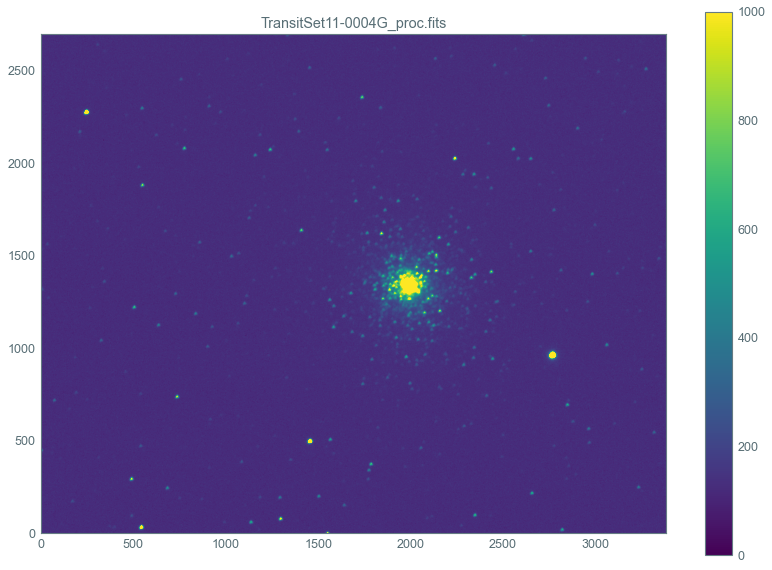

TransitSet11-0004R_proc.fits


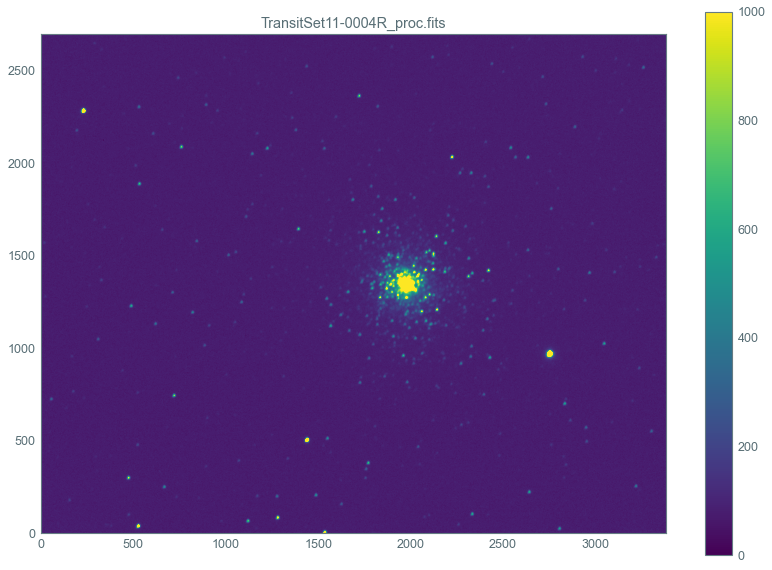

In [5]:
names = ['CCD Image 363_proc.fits', 'TransitSet11-0004G_proc.fits', 'TransitSet11-0004R_proc.fits']
for i in names:
    print(i)
    im, head = fits.getdata(i, 0 , header=True)
    plt.figure(figsize=(14,10))
    plt.imshow(im, vmin = 0, vmax=1000, origin='lower')
    plt.title(i)
    plt.grid(False)
    plt.colorbar()
    plt.show()

### Choice canidates: 
<ul>
    <li>TransitSet11-0004G_proc.fits </li>
    <li>TransitSet11-0004B_proc.fits </li>
    <li>TransitSet11-0004R_proc.fits </li>
    <li>TransitSet11-0005G_proc.fits </li> 
    <li>TransitSet11-0005R_proc.fits </li>
</ul>
Gosh darn are we lucky to have at least one of each color... The ones chosen seem to have minimum streaking and removed most of the background.

The target to be focused on for the rest of the development will be: <b> TransitSet11-0004G_proc.fits </b>

### The steps that need to be taken: 
<ol>
    <li> background estimation and subtraction (?)</li>
    <li> Detection using DaoStarFinder </li>
    <li> If the detection above doesn't seem to work, try using psf photometry (the funky guassian fit shit). </li>
    <li> Create Apetures for each star and measure the flux </li>
    <li> Create WCS item for the image </li>
    <li> Registration against SDSS </li>
    <li> Create CMD for SDSS stars </li>
    <li> Create CMD for our data </li>
    <li> Repeat in all three colors </li>
</ol>

In [6]:
# Loading in all images and processing their photometry
print("Running 0004 Green:")
imG_4, headG_4 = fits.getdata('TransitSet11-0004G_proc.fits', 0 , header=True)
CCDDatG_4 = prometheus.ccddata.CCDData.read('TransitSet11-0004G_proc.fits')
catG_4,modelG_4,skyG_4,psfG_4 = prometheus.run(CCDDatG_4,'penny',verbose=True,lookup=True)
print()

print("Running 0004 Red:")
imR_4, headR_4 = fits.getdata('TransitSet11-0004R_proc.fits', 0 , header=True)
CCDDatR_4 = prometheus.ccddata.CCDData.read('TransitSet11-0004R_proc.fits')
catR_4,modelR_4,skyR_4,psfR_4 = prometheus.run(CCDDatR_4,'penny',verbose=True,lookup=True)
print()

print("Running 0004 Blue:")
imB_4, headB_4 = fits.getdata('CCD Image 363_proc.fits', 0 , header=True)
CCDDatB_4 = prometheus.ccddata.CCDData.read('TransitSet11-0004B_proc.fits')
catB_4,modelB_4,skyB_4,psfB_4 = prometheus.run(CCDDatB_4,'penny',verbose=True,lookup=True)

Running 0004 Green:
Step 1: Detection
931 objects detected
Step 2: Aperture photometry
Min/Max mag: 10.39, 16.52
Step 3: Construct the PSF
FWHM = 10.01 pixels (143 sources)
84 PSF stars found
Final PSF: PSFPenny([5.258307031759952, 4.832476328583957, 0.4, 0.10000000000000002, 5.0],binned=False,npix=51,lookup=True) FWHM=11.76
Median RMS:  0.1208
Step 4: Get PSF photometry for all 931 objects
Applying correction for exposure time 30.00 s
dt = 33.51 sec

Running 0004 Red:
Step 1: Detection
927 objects detected
Step 2: Aperture photometry
Min/Max mag: 10.11, 16.86
Step 3: Construct the PSF
FWHM =  9.72 pixels (178 sources)
91 PSF stars found
Final PSF: PSFPenny([4.719891578603204, 4.721470100152349, 0.0, 0.10000000000000002, 5.0],binned=False,npix=51,lookup=True) FWHM=10.92
Median RMS:  0.1165
Step 4: Get PSF photometry for all 927 objects
Applying correction for exposure time 30.00 s
dt = 17.08 sec

Running 0004 Blue:
Step 1: Detection
919 objects detected
Step 2: Aperture photometry
Min/

In [7]:
catG_4

id,thresh,npix,tnpix,xmin,xmax,ymin,ymax,xc,yc,x2,y2,xy,errx2,erry2,errxy,asemi,bsemi,theta,cflux,sumflux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flags,fwhm,ndetiter,flux_aper1,fluxerr_aper1,mag_aper1,magerr_aper1,flag_aper1,flux_auto,fluxerr_auto,mag_auto,magerr_auto,kronrad,flag_auto,snr,group_id,height,psfheight_error,x,x_error,y,y_error,sky,psfflux,psfflux_error,psfmag,psfmag_error,niter,ngroup,rms,chisq,psfheight
int32,float64,int32,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,int32,float64,int32,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,int16,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64
1,55.670562744140625,202,169,1538,1561,0,11,1550.0344800011574,2.9259552530261557,16.956081690355518,5.724521783050779,0.4981132312691372,0.0030984202466775306,0.0010447941067926517,7.012084001046943e-05,4.120452404022217,2.3879854679107666,0.044233664870262146,66509.734375,73634.1640625,1185.394775390625,1568.2283935546875,1550,1,1549,0,2,7.3715048057721715,1,26355.781474609383,603.6079443249656,13.947810255008546,0.024865853409226504,0,76638.40665435791,870.370356884709,12.788883832514717,0.012330535684019824,1.4339552296642883,48,88.1551319306212,393,909.0019072220666,42.418745627793534,1549.5625051094214,0.1515771964748927,1.4259552530261557,0.22928667659171784,94.45002731850322,166314.366942673,7761.091334944009,15.64047871918601,0.05066608499124941,3,1,0.2099796219614228,178.1058373852672,909.0019072220666
2,55.12525939941406,435,381,2806,2830,6,29,2818.317336382007,17.47386314317682,23.845331764253586,22.4021965804549,2.333784354702118,0.0032758960952678252,0.0030459845350005493,0.0003121772178671372,5.056337833404541,4.547634124755859,0.6354678869247437,94260.390625,94611.1328125,548.4053344726562,689.017578125,2819,20,2818,20,0,11.268825717523043,1,14200.764520263678,460.14841782992494,14.619220685170164,0.03518119014558831,0,103356.29356384277,1248.6162882077153,12.464157683009487,0.013116452450188113,1.4580289590756361,48,82.87301799995551,393,826.6556643045316,13.884714826029187,2818.300852118805,0.06963593822137913,17.30389600841137,0.07037472116103259,94.70852224181147,151247.99232659457,2540.3990224043087,15.743579090508854,0.018236296235923852,3,1,0.0714822941127142,50.12404441386013,826.6556643045316
3,55.54102325439453,10,0,371,374,34,39,372.2994597046298,36.27354332969294,0.9864149349810507,2.8009131090689054,0.5324438862444274,0.040020157357232834,0.1179821114828527,0.023723916385074376,1.7162789106369019,0.9174501299858093,1.3054389953613281,502.0885009765625,213.9744873046875,52.63991928100586,48.87592315673828,373,37,373,39,0,2.9488523547430723,1,1370.36115234375,206.57464422933194,17.15791240364161,0.16366894948913033,0,6919.382957458496,580.5928171557806,15.399831581097672,0.09110214677871858,3.2770663929787447,0,11.931661749313712,393,1.3517357842043736,6.939687953631235,371.2994597046298,31.61660147422257,37.27354332969294,32.87335856177204,127.3773422241211,247.31860234566793,1269.7110969932344,22.709661177959855,5.574070427835986,10,1,36.10136001910732,2.4250445778150818,1.3517357842043736
4,37.00012969970703,22,15,393,399,31,35,395.9172382665468,32.760302370282815,3.3610562506472803,1.3084000589155975,0.49116348887727046,0.050761956517000405,0.01976224207026309,0.009126636828619566,1.86347234249115,1.0940417051315308,0.2231760323047638,1312.934814453125,1211.0096435546875,68.12145233154297,129.57725524902344,396,33,397,33,1,3.3554152716277996,1,1710.6675985717777,215.49496911417043,16.917085926074954,0.1367715680742594,0,12546.119682312012,708.468609186488,14.753726434687655,0.061310591514033536,3.4741757677578176,0,17.72939998060847,393,36.007807850949355,40.67679657332532,396.7319763032211,1.96624026897321,33.760302370282815,2.0402650385319667,126.165954589

In [8]:
# loading in WCS objects
wG_4 = WCS('0004G_wcs.fits')
wR_4 = WCS('0004R_wcs.fits')
wB_4 = WCS('0004B_wcs.fits')

In [9]:
wG_4

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 322.555253572  12.1389595464  
CRPIX : 1738.1333313  884.449333191  
CD1_1 CD1_2  : -9.5749184684e-06  -0.000128109613667  
CD2_1 CD2_2  : 0.000128334154208  -9.52760095355e-06  
NAXIS : 0  0

In [10]:
from astropy.coordinates import SkyCoord

# loading in WCS objects
wG_4 = WCS('0004G_wcs.fits')
wR_4 = WCS('0004R_wcs.fits')
wB_4 = WCS('0004B_wcs.fits')

cG_4 = SkyCoord(ra='21h29m36s', dec='12deg11m31s', frame='icrs')
wG_4.wcs.crval, wG_4.wcs.crpix = [[cG_4.ra.degree, cG_4.dec.degree], [2238.2, 2024.4]]
cR_4 = SkyCoord(ra='21h29m36s', dec='12deg11m31s', frame='icrs')
wR_4.wcs.crval, wR_4.wcs.crpix = [[cR_4.ra.degree, cR_4.dec.degree], [2223.1, 2031.9]]
cB_4 = SkyCoord(ra='21h29m36s', dec='12deg11m31s', frame='icrs')
wB_4.wcs.crval, wB_4.wcs.crpix = [[cB_4.ra.degree, cB_4.dec.degree], [2253.1, 2018.1]]

In [11]:
tuple(wR_4.wcs_world2pix(np.array(wB_4.wcs_pix2world(catB_4['xc'], catB_4['yc'], 0)).T, 0).T)

(array([1542.82509127, 1164.97044999, 1160.03254917,  380.83844634,
        2806.67591386,  356.76905483, 2260.57988663,  528.59674924,
         978.40602533, 1122.88315488, 2075.69990752, 1282.73923467,
        2096.48524642, 2419.91603521,  475.75095627, 2333.92641457,
        1626.94885976,  155.25882558,  161.62693438,  856.19147225,
         857.3221651 ,  853.93810172,  734.07360259, 1171.55806822,
        1278.46130126, 1488.82425085, 1494.20905829, 2643.20864617,
         663.65784548,  669.03041792, 3219.91348297, 2833.01674221,
        1756.35869538, 2829.90781536, 1765.32898406,  475.75396177,
        2877.09099847, 2879.28850875, 1760.77634839, 1963.82997254,
        1947.20917653, 1955.49803803, 2052.45933766, 2842.67662614,
        2047.90582093, 1771.96318793, 1070.85535349, 1077.36084684,
        1336.39251747,  297.29986595, 2825.1464854 , 2142.61078216,
        1569.64881547, 1945.07611336,  -14.77828868, 1156.30237572,
        2040.88593598, 2048.4924452 , 2760.30594

In [12]:
np.array([[SkyCoord.from_name('M15').ra.degree, SkyCoord.from_name('M15').dec.degree]]).T

array([[322.49304167],
       [ 12.167     ]])

In [13]:
m15_coords = wR_4.wcs_world2pix(np.array([[SkyCoord.from_name('M15').ra.degree, SkyCoord.from_name('M15').dec.degree]]), 0)[0]
m15_coords

array([1976.19555655, 1338.85499307])

In [14]:
points_G = wR_4.wcs_world2pix(np.array(wG_4.wcs_pix2world(catG_4['xc'], catG_4['yc'], 0)).T, 0).T
points_R = wR_4.wcs_world2pix(np.array(wR_4.wcs_pix2world(catR_4['xc'], catR_4['yc'], 0)).T, 0).T
points_B = wR_4.wcs_world2pix(np.array(wB_4.wcs_pix2world(catB_4['xc'], catB_4['yc'], 0)).T, 0).T

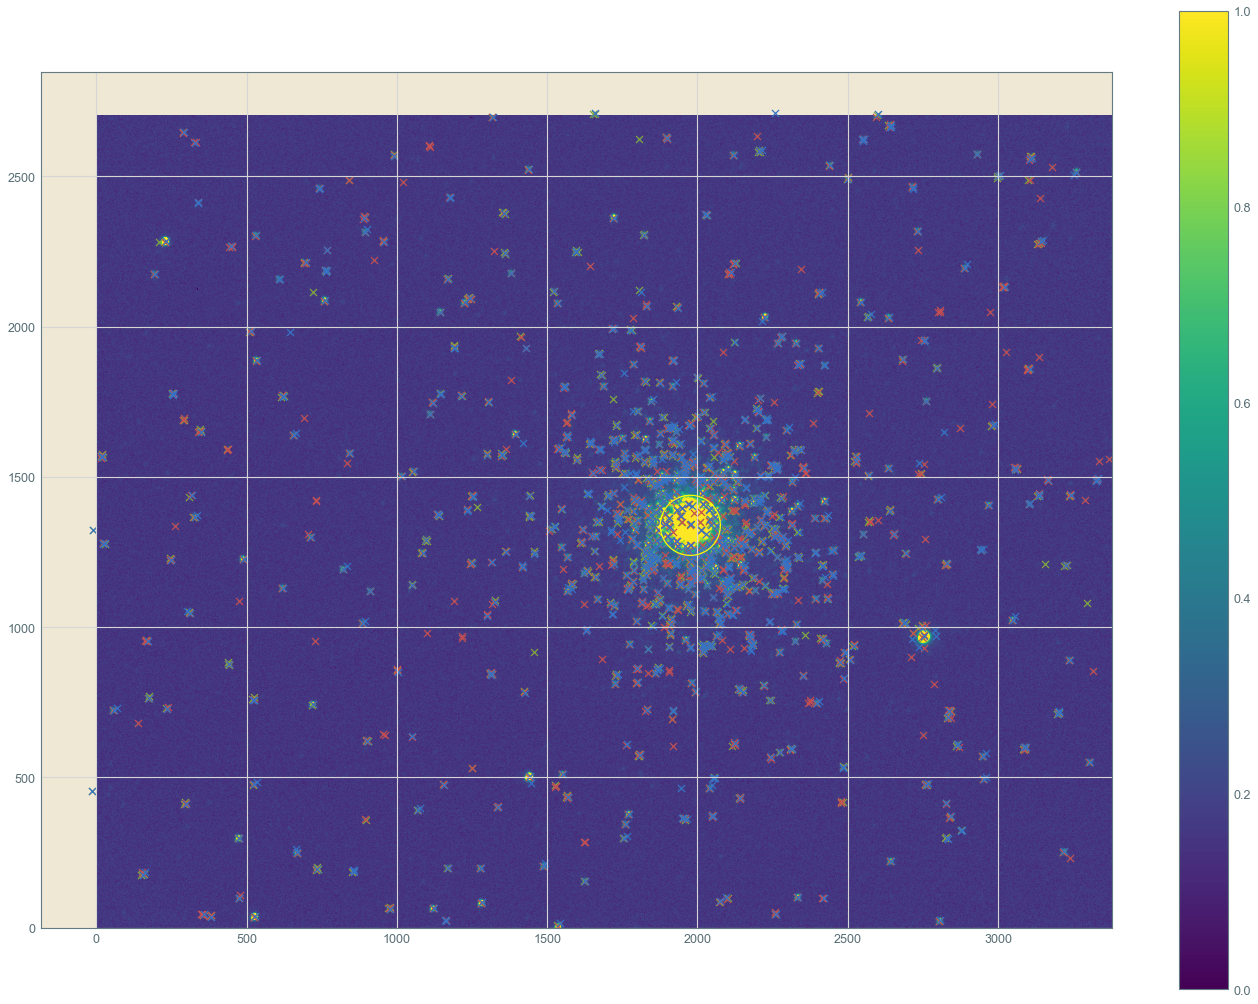

In [15]:
%matplotlib inline
#catG_4,modelG_4,skyG_4,psfG_4


plt.figure(figsize=(24,18))
# plt.subplot(projection=wR_4)
plt.imshow(imR_4,vmin=0, vmax=500,origin='lower')

theta = np.linspace( 0 , 2 * np.pi , 150 )
m15_coords = wR_4.wcs_world2pix(np.array([[SkyCoord.from_name('M15').ra.degree, SkyCoord.from_name('M15').dec.degree]]), 0)[0]

radius = 100
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )
plt.plot(a+m15_coords[0],b+m15_coords[1], color='yellow')

plt.scatter(points_G[0], points_G[1], marker='x', c='g', s=50)
plt.scatter(points_R[0], points_R[1], marker='x', c='r', s=50)
plt.scatter(points_B[0], points_B[1], marker='x', c='b', s=50)

plt.colorbar()
plt.show()

In [16]:
from dlnpyutils import coords

d = coords.xmatch(points_B[0], points_B[1], points_R[0], points_R[1], sphere=False, dcr=10)

In [210]:
def quick_xmatch(data1, data2, max_rad = 20):
    max_rad = max_rad**2
    set_Data, new_Data = (data1, data2) if len(data1[0]) > len(data1[0]) else (data2, data1)
    set_Data, new_Data = data1, data2
    trans_list = []
    dis_list = []
    for b in zip(new_Data[0], new_Data[1]):
        min_dis = (10e10, None)
        counter = 0
        for r in zip(set_Data[0], set_Data[1]):
            dist = (b[0]-r[0])**2 + (b[1]-r[1])**2
            if dist < min_dis[0]: min_dis = (dist, counter)
            counter += 1
        dis_list.append(min_dis[0])
        if min_dis[1] in trans_list:
            index = trans_list.index(min_dis[1])
            if min_dis[0] < dis_list[index]:
                trans_list.append(min_dis[1])
                trans_list[index] = None
            else:
                trans_list.append(None)
        else:
            trans_list.append(min_dis[1])
        if min_dis[0] > max_rad: trans_list[-1] = None
    return trans_list

In [224]:
def mag_match(match_list, give_target, get_target, get_dat, comped = points_R):
    count = -1
    for match in match_list:
        count += 1
        if match == None: continue
        row = all_mags[(all_mags['xc'] == comped[0, match]) & (all_mags['yc'] == comped[1, match])]
        row[give_target] = get_dat[count][get_target]
        all_mags[(all_mags['xc'] == comped[0, match]) & (all_mags['yc'] == comped[1, match])] = row
        all_mags[(all_mags['xc'] == comped[0, match]) & (all_mags['yc'] == comped[1, match])]

In [280]:
all_mags = table.Table()
all_mags['xc'] = points_R[0]
all_mags['yc'] = points_R[1]
all_mags['MAG_3R'] = catR_4['mag_auto']
all_mags['MAG_3G'] = None
all_mags['MAG_3B'] = None

In [281]:
trans_list_B = quick_xmatch(points_R, points_B)
trans_list_G = quick_xmatch(points_R, points_G)

In [282]:
mag_match(trans_list_B, 'MAG_3B', 'mag_auto', catB_4)
mag_match(trans_list_G, 'MAG_3G', 'mag_auto', catG_4)

In [283]:
all_mags = all_mags[all_mags['MAG_3B'] != None]
all_mags = all_mags[all_mags['MAG_3G'] != None]

In [284]:
from dl import queryClient as qc
sdss = qc.query(sql='select ra, dec, g, r from sdss_dr16.photoplate where q3c_radial_query(ra,dec,322.493,12.167,0.3)',fmt='table')
sdss_pix = wR_4.wcs_world2pix(np.array([sdss['ra'], sdss['dec']]).T, 0).T

trans_list_sdss_R = quick_xmatch(points_R, sdss_pix)
trans_list_sdss_G = quick_xmatch(points_R, sdss_pix)
trans_list_sdss_B = quick_xmatch(points_R, sdss_pix)

all_mags['sdss_R'] = None
all_mags['sdss_G'] = None
all_mags['sdss_B'] = None

mag_match(trans_list_sdss_R, 'sdss_R', 'r', sdss)
mag_match(trans_list_sdss_G, 'sdss_B', 'g', sdss)
# mag_match(trans_list_sdss_B, 'sdss_B', 'u', sdss)

In [285]:
reds = all_mags[all_mags['sdss_R'] != None]
red_offset = np.mean(reds['sdss_R'] - reds['MAG_3R'])
all_mags['MAG_3R'] += red_offset

reds = all_mags[all_mags['sdss_B'] != None]
red_offset = np.mean(reds['MAG_3B'] - reds['sdss_B'])
all_mags['MAG_3B'] += red_offset

In [286]:
all_mags

xc,yc,MAG_3R,MAG_3G,MAG_3B,sdss_R,sdss_G,sdss_B
float64,float64,float64,object,object,object,object,object
1534.88184155581,5.308114044504009,11.876659163043561,12.788883832514717,14.640109133113528,None,None,None
2803.8535215351258,23.67342501686403,13.051910427640259,12.464157683009487,12.326701912057493,None,None,None
378.82302224909995,37.80761478872387,15.73641813951064,14.753726434687655,15.629907357707467,None,None,None
354.0310261354198,44.19222208123233,16.56611893980528,15.399831581097672,16.221489049021184,None,None,None
526.1449321249161,37.47332400616324,11.338625848304348,10.530390355384702,10.11946350207663,None,None,None
2257.5412384315127,45.39874482178698,14.895617553390654,14.61407812802647,15.05482404876315,None,None,None
977.5861745974842,65.15160023410772,15.721638993240106,14.860862872471623,14.630505712046293,15.573146,None,15.955643
1119.2421790071853,64.92989531642843,12.68808051454233,12.376383190596066,12.36717470787706,None,None,None
2074.3358703167696,85.66470906055179,15.343174529059906,14.536180599177854,14.665881178346986,15.258993,None,15.861561


<IPython.core.display.Javascript object>


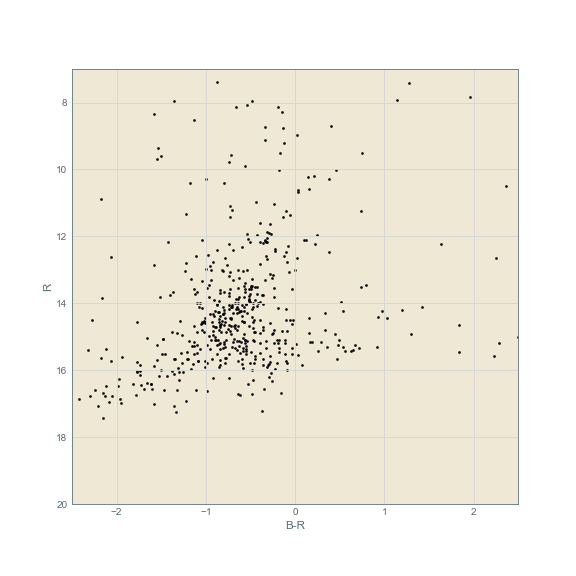

In [287]:
plt.figure(figsize=(10,10))
plt.scatter(all_mags['MAG_3B'] - all_mags['MAG_3R'],
            all_mags['MAG_3R']
            , s = 10, color='black')
plt.ylim(20,7)
plt.xlim(-2.5, 2.5)
plt.xlabel('B-R')
plt.ylabel('R')
plt.show()

In [112]:
plt.scatter(all_mags['MAG_3G'] - all_mags['MAG_3R'],
            all_mags['MAG_3G']
            , s = 10)
# plt.ylim(10,27)
# plt.xlim(-0.05, 0.05)
plt.show()

<IPython.core.display.Javascript object>


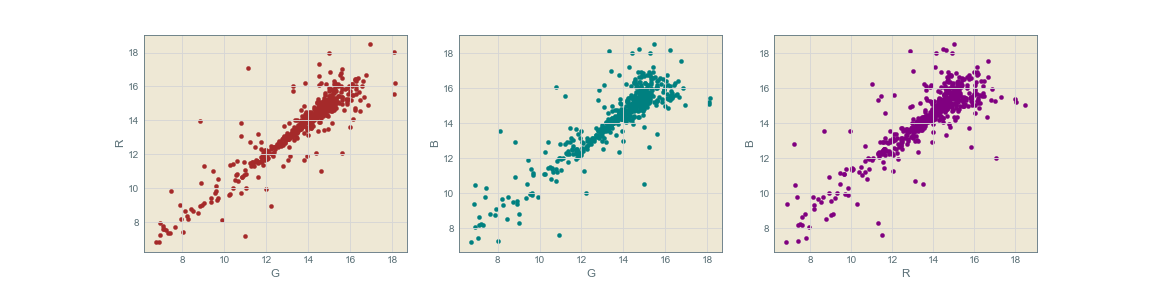

Text(0, 0.5, 'B')

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(all_mags['MAG_3G'], all_mags['MAG_3R'], color='brown')
# x = np.linspace(np.min(all_mags['MAG_3G']), np.max(all_mags['MAG_3G']))
# plt.plot(x, x)
plt.xlabel('G')
plt.ylabel('R')
plt.subplot(1,3,2)
plt.scatter(all_mags['MAG_3G'], all_mags['MAG_3B'], color='teal')
plt.xlabel('G')
plt.ylabel('B')
plt.subplot(1,3,3)
plt.scatter(all_mags['MAG_3R'], all_mags['MAG_3B'], color='purple')
plt.xlabel('R')
plt.ylabel('B')